Best:  {'C': 10000, 'epsilon': 0.001, 'kernel': 'sigmoid'}
R^2 на учебной выборке: 0.8202797962765028
R^2 на проверочной выборке: 0.9149401044361126


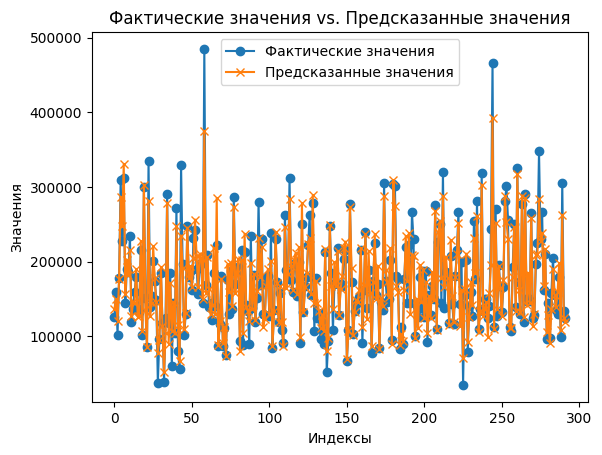

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


from sklearn.discriminant_analysis import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score


def find_sparse_columns(df, threshold=1):
    total_rows = df.shape[0]
    sparse_columns = []

    for column in df.columns:
        non_null_count = df[column].count()

        if non_null_count / total_rows < threshold:
            sparse_columns.append(column)

    return sparse_columns



train = pd.read_csv("train.csv")
X, y = train.drop("SalePrice", axis=1), train["SalePrice"]


# TODO попробовать заменить на маппинг
X = pd.get_dummies(X)


sparse_columns = find_sparse_columns(X)
X = X.drop(sparse_columns, axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


params = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "C": [10, 100, 1000, 10_000, 100_000],
    "epsilon": [0.001, 0.01, 0.1, 1],
}


model = SVR()
grid_search = GridSearchCV(model, params, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best: ", grid_search.best_params_)

y_train_pred = best_model.predict(X_train)

y_test_pred = best_model.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R^2 на учебной выборке: {r2_train}")
print(f"R^2 на проверочной выборке: {r2_test}")

x_values = np.arange(len(y_test))

plt.plot(x_values, y_test, label="Фактические значения", marker="o")
plt.plot(x_values, y_test_pred, label="Предсказанные значения", marker="x")

plt.title("Фактические значения vs. Предсказанные значения")
plt.xlabel("Индексы")
plt.ylabel("Значения")

plt.legend()
plt.show()